## Naufal Khairul Rizky
### 5025221127
### Pengolahan Citra dan Visi Komputer

### Tugas 1: Pengolahan Citra pada Domain Spasial dan Frekuensi


## Import Libraries


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


## Spatial Domain

In [2]:
# Function to apply CLAHE
def apply_clahe(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gray_image)
    return clahe_image

In [45]:
# def apply_histogram_equalization(image):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     equalized_image = cv2.equalizeHist(gray_image)
#     return equalized_image

In [4]:
# Function to convert to black and white
def apply_black_and_white(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bw_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return bw_image


In [5]:
# Function to adjust brightness
def adjust_brightness(image, brightness=50):
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Increase brightness by adding value (capped at 255)
    v = cv2.add(v, brightness)
    v[v > 255] = 255

    final_hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return bright_image

In [7]:
# Function to apply Bilateral filter (smoothing)
def apply_bilateral_smoothing(image):
    bilateral_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    return bilateral_image


In [8]:
def apply_sharpening(image):
    # Define a sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5,-1],
                                  [0, -1, 0]])

    # Apply the kernel to the image
    sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

    return sharpened_image


In [9]:
# Function to apply manual Sobel filter
def apply_sobel(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Sobel kernels for x and y direction
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    # Initialize gradient matrices for x and y
    gradient_x = np.zeros_like(gray_image, dtype=np.float32)
    gradient_y = np.zeros_like(gray_image, dtype=np.float32)

    # Apply convolution using the Sobel kernels
    rows, cols = gray_image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extract the 3x3 region
            region = gray_image[i-1:i+2, j-1:j+2]

            # Convolve with Sobel x and y kernels
            gx = np.sum(sobel_x * region)
            gy = np.sum(sobel_y * region)

            # Store the gradient
            gradient_x[i, j] = gx
            gradient_y[i, j] = gy

    # Calculate the magnitude of gradients
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize to range 0-255
    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    return magnitude

In [3]:
# # Function to apply Sobel filter
# def apply_sobel(image):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel X
#     sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Y
#     sobel_combined = cv2.magnitude(sobelx, sobely)  # Magnitude of gradients
#     return np.uint8(sobel_combined)

In [10]:
def apply_laplacian(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Laplacian kernel
    laplacian_kernel = np.array([[0,  1,  0],
                                [1, -4,  1],
                                [0,  1,  0]])

    # Initialize Laplacian image
    laplacian_image = np.zeros_like(gray_image, dtype=np.float32)

    # Apply convolution using the Laplacian kernel
    rows, cols = gray_image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = gray_image[i-1:i+2, j-1:j+2]
            laplacian_value = np.sum(laplacian_kernel * region)
            laplacian_image[i, j] = laplacian_value

    # Normalize to range 0-255
    laplacian_image = np.uint8(np.clip(laplacian_image, 0, 255))

    return laplacian_image

In [6]:
# # Function to apply Laplacian filter
# def apply_laplacian(image):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
#     return np.uint8(np.abs(laplacian))


## Frequency Domain

In [11]:
# Function to apply DFT
def apply_dft(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to float32
    gray_image = np.float32(gray_image)

    # Add padding to the image to make its size a power of 2
    rows, cols = gray_image.shape
    m = cv2.getOptimalDFTSize(rows)
    n = cv2.getOptimalDFTSize(cols)
    padded_image = cv2.copyMakeBorder(gray_image, 0, m - rows, 0, n - cols, cv2.BORDER_CONSTANT, value=0)

    # Apply DFT
    dft = cv2.dft(np.expand_dims(padded_image, axis=2), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center
    dft_shift = np.fft.fftshift(dft)

    # Calculate magnitude spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

    return magnitude_spectrum, padded_image

In [12]:

# Function to apply Homomorphic filtering
def apply_homomorphic_filter(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert image to float32 and normalize
    img_float32 = np.float32(gray_image) / 255.0

    # Perform the Fourier Transform
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create the filter
    rows, cols = gray_image.shape
    center = (rows // 2, cols // 2)
    radius = 30  # You can adjust the radius of the filter
    mask = np.ones((rows, cols, 2), np.float32)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - center[1])**2 + (y - center[0])**2 <= radius**2
    mask[mask_area] = 0.5  # Low-pass filter effect

    # Apply the filter
    filtered_dft_shift = dft_shift * mask

    # Inverse FFT
    idft_shift = np.fft.ifftshift(filtered_dft_shift)
    img_back = cv2.idft(idft_shift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize to 0-255
    img_back = np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

    return img_back


## Image Loader and Display

In [13]:
# Function to load image from local path
def load_image_from_path(path):
    img = cv2.imread(path)
    return img

In [14]:
# Function to display images
def display_image(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(10,5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    # Processed image
    plt.subplot(1, 2, 2)
    if len(processed.shape) == 2:  # Grayscale images
        plt.imshow(processed, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

In [41]:
def display_histogram(original, processed):
    plt.figure(figsize=(10, 5))

    # Histogram of original image
    plt.subplot(1, 2, 1)
    plt.hist(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY).ravel(), 256, [0, 256])
    plt.title("Histogram - Original")

    # Histogram of processed image
    plt.subplot(1, 2, 2)
    plt.hist(processed.ravel(), 256, [0, 256])
    plt.title("Histogram - Processed")

    plt.show()

## TestCase 1 (Black and White Picture)


In [48]:
path = '/content/download (1).png'

image = load_image_from_path(path)

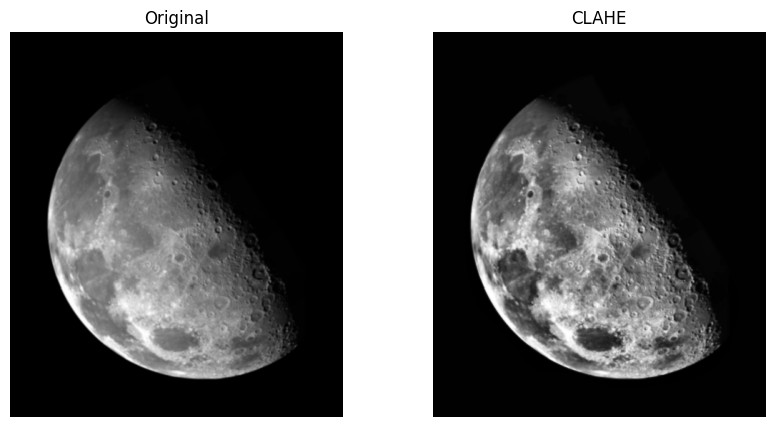

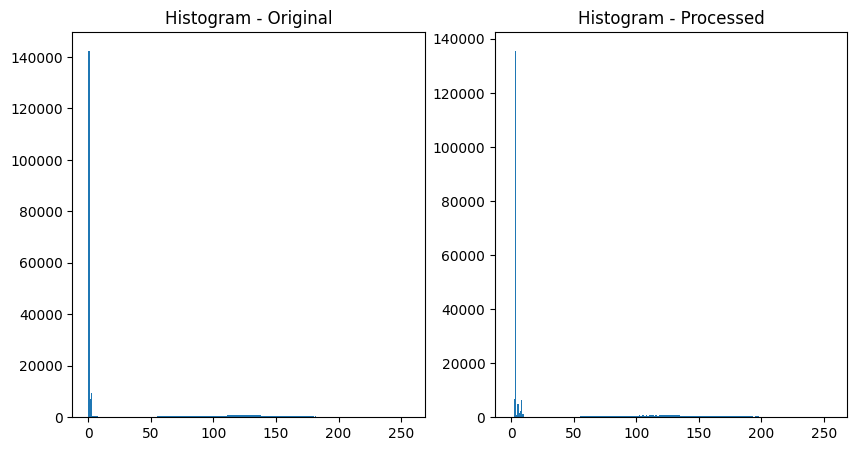

In [50]:
clahe_image = apply_clahe(image)
display_image(image, clahe_image, title2="CLAHE")
display_histogram(image, clahe_image)

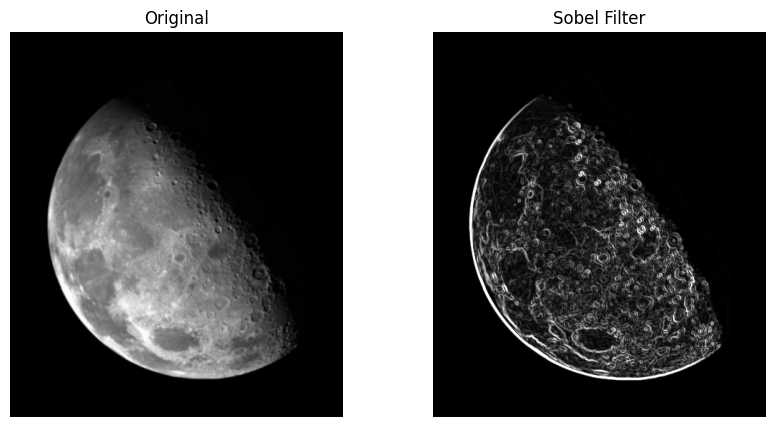

In [17]:
sobel_image = apply_sobel(image)
display_image(image, sobel_image, title2="Sobel Filter")

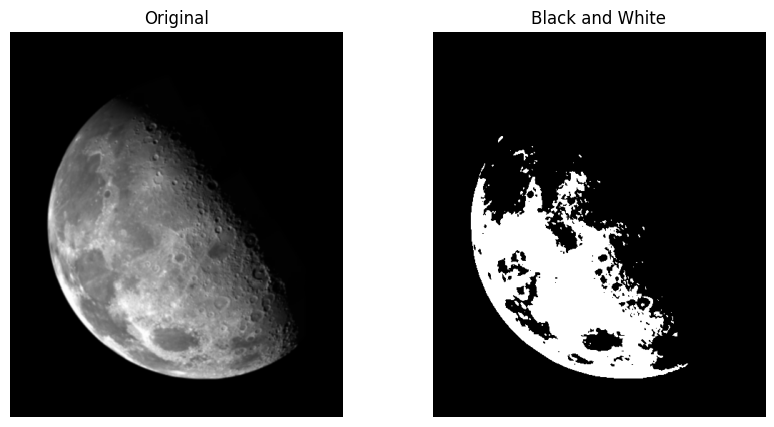

In [18]:
bw_image = apply_black_and_white(image)
display_image(image, bw_image, title2="Black and White")

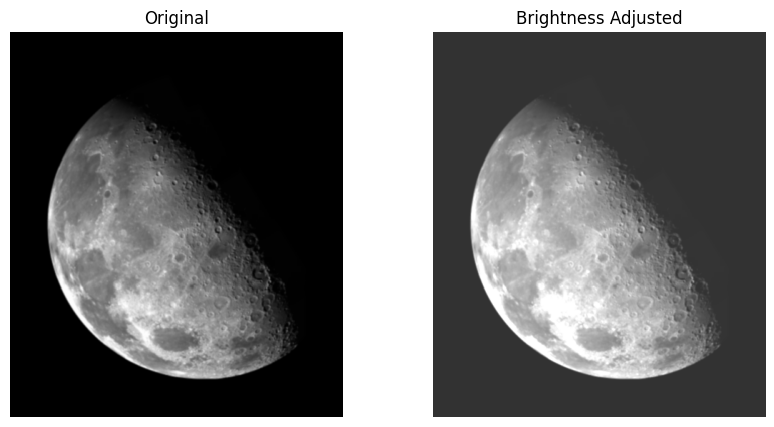

In [19]:
bright_image = adjust_brightness(image, brightness=50)
display_image(image, bright_image, title2="Brightness Adjusted")

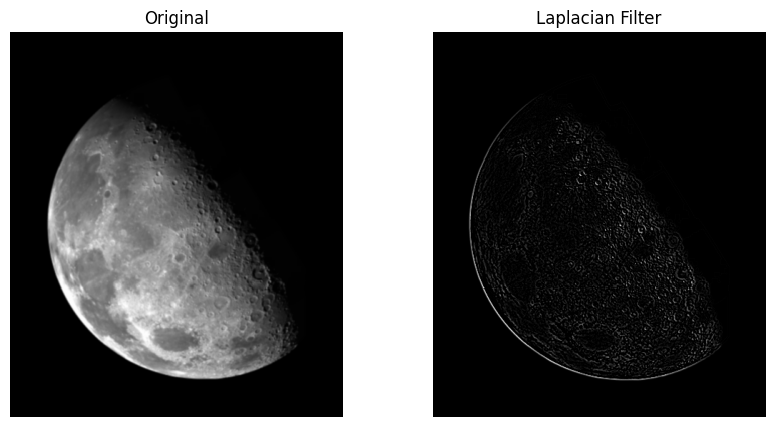

In [20]:
laplacian_image = apply_laplacian(image)
display_image(image, laplacian_image, title2="Laplacian Filter")

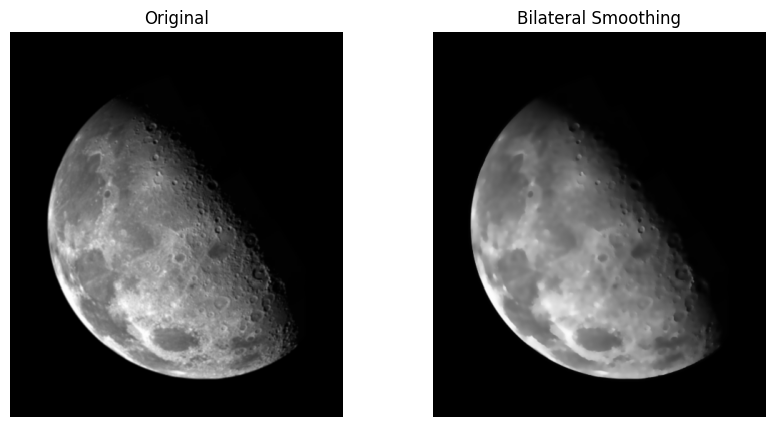

In [21]:
bilateral_image = apply_bilateral_smoothing(image)
display_image(image, bilateral_image, title2="Bilateral Smoothing")


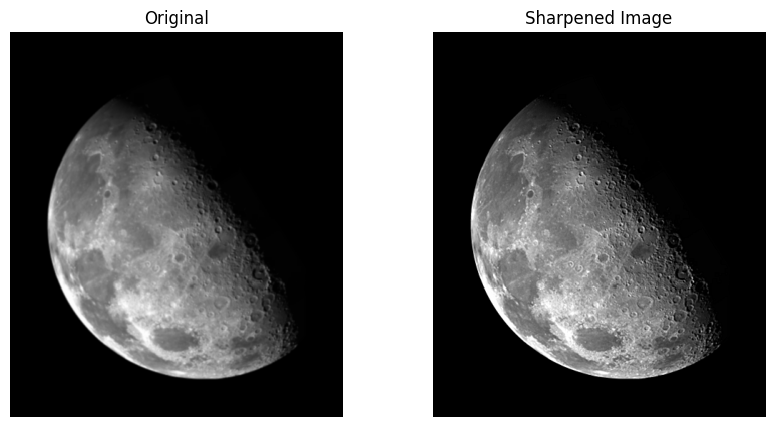

In [22]:
# Apply sharpening
sharpened_image = apply_sharpening(image)

# Display original and sharpened images
display_image(image, sharpened_image, title2="Sharpened Image")

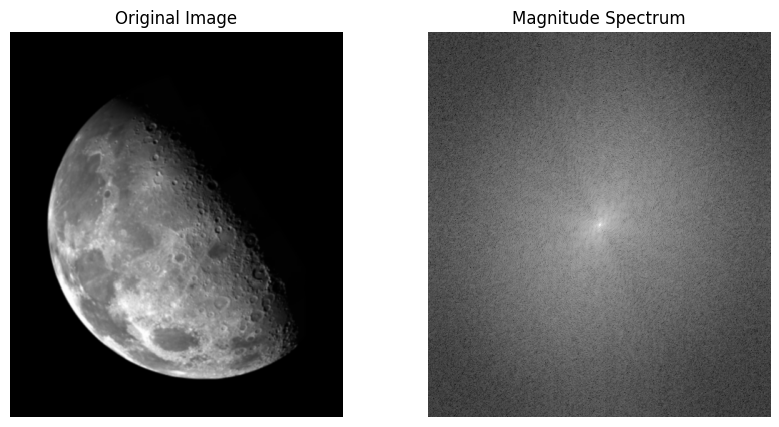

In [23]:
# Apply DFT and get magnitude spectrum
magnitude_spectrum, padded_image = apply_dft(image)

# Display the results
display_image(image, magnitude_spectrum, title1="Original Image", title2="Magnitude Spectrum")

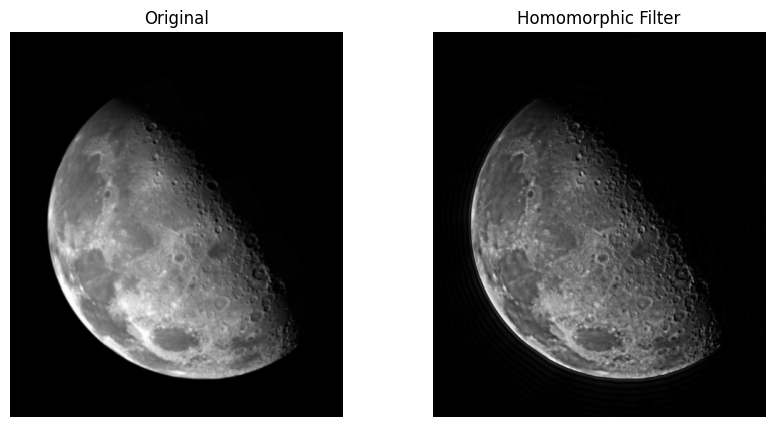

In [24]:
# Load the image from the path
image = load_image_from_path(path)

# Apply Homomorphic filtering
homomorphic_image = apply_homomorphic_filter(image)
display_image(image, homomorphic_image, title2="Homomorphic Filter")


## TestCase 2 (Colored Image)

In [43]:
path = '/content/download (2).png'

image = load_image_from_path(path)

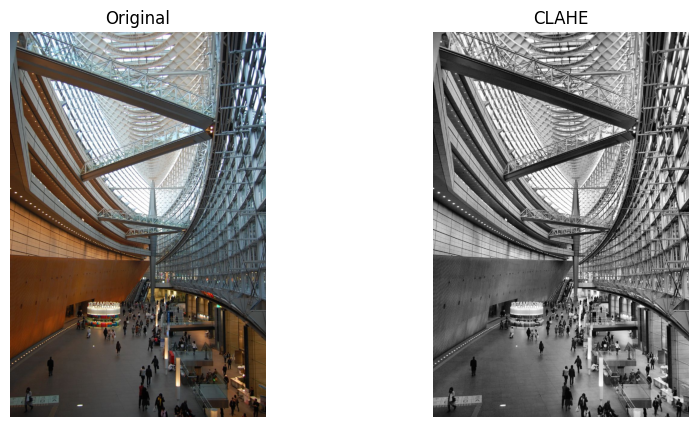

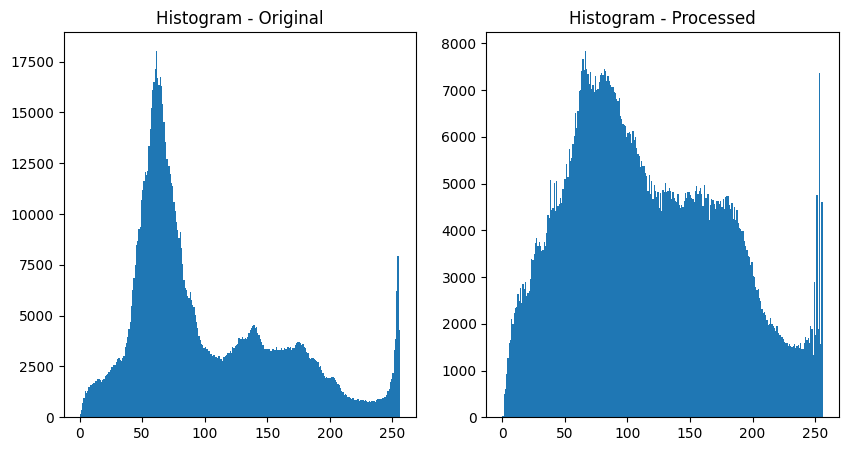

In [44]:
clahe_image = apply_clahe(image)
display_image(image, clahe_image, title2="CLAHE")
display_histogram(image, clahe_image)

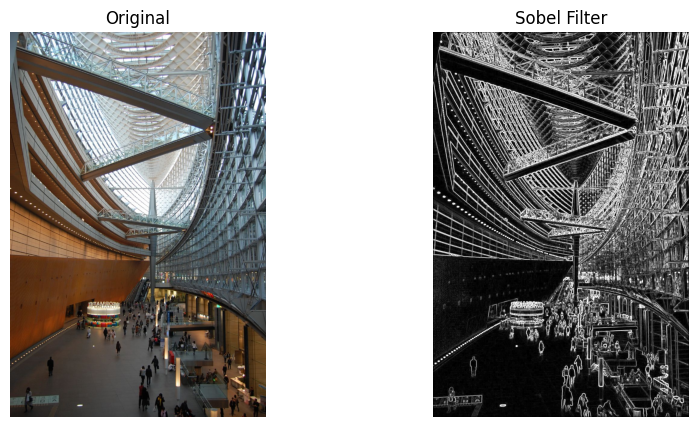

In [34]:
sobel_image = apply_sobel(image)
display_image(image, sobel_image, title2="Sobel Filter")

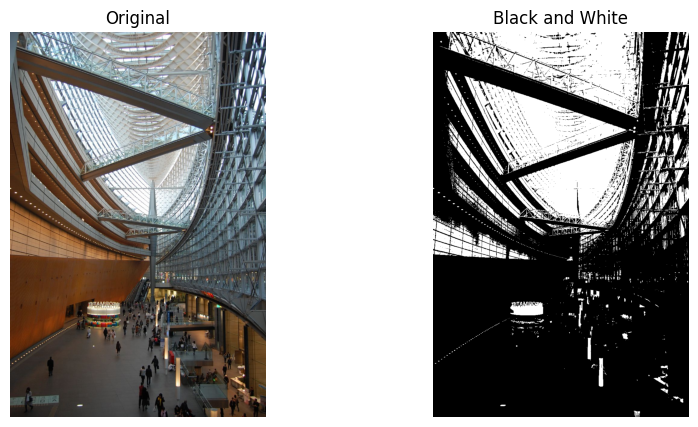

In [37]:
bw_image = apply_black_and_white(image)
display_image(image, bw_image, title2="Black and White")

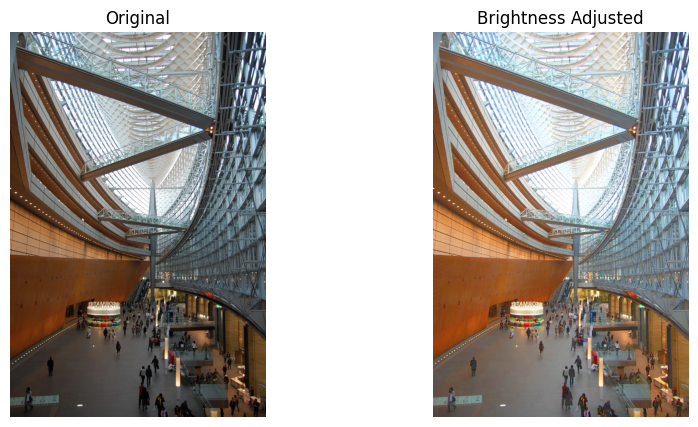

In [28]:
bright_image = adjust_brightness(image, brightness=50)
display_image(image, bright_image, title2="Brightness Adjusted")

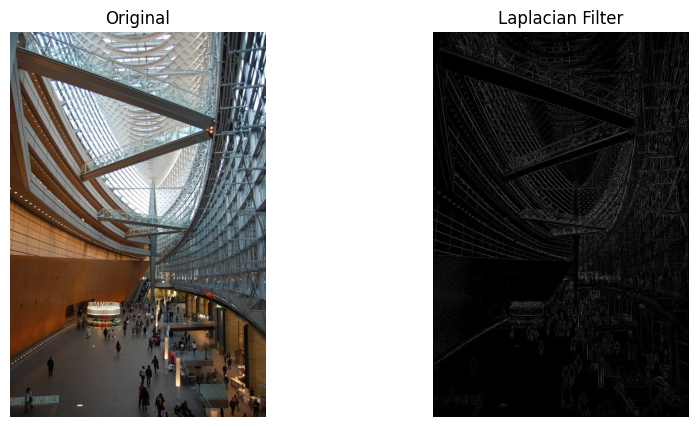

In [29]:
laplacian_image = apply_laplacian(image)
display_image(image, laplacian_image, title2="Laplacian Filter")

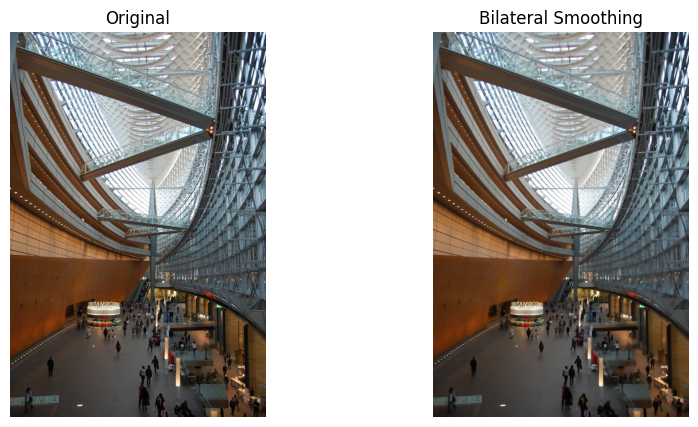

In [30]:
bilateral_image = apply_bilateral_smoothing(image)
display_image(image, bilateral_image, title2="Bilateral Smoothing")


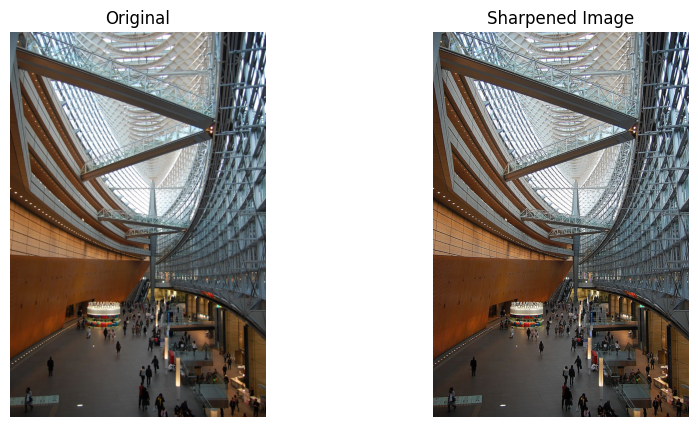

In [31]:
# Apply sharpening
sharpened_image = apply_sharpening(image)

# Display original and sharpened images
display_image(image, sharpened_image, title2="Sharpened Image")

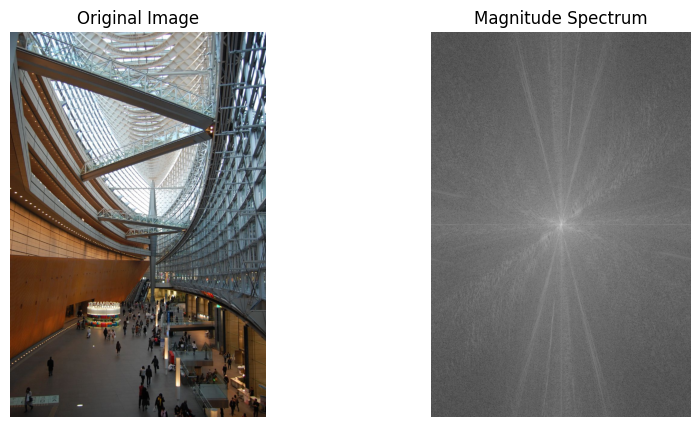

In [32]:
# Apply DFT and get magnitude spectrum
magnitude_spectrum, padded_image = apply_dft(image)

# Display the results
display_image(image, magnitude_spectrum, title1="Original Image", title2="Magnitude Spectrum")

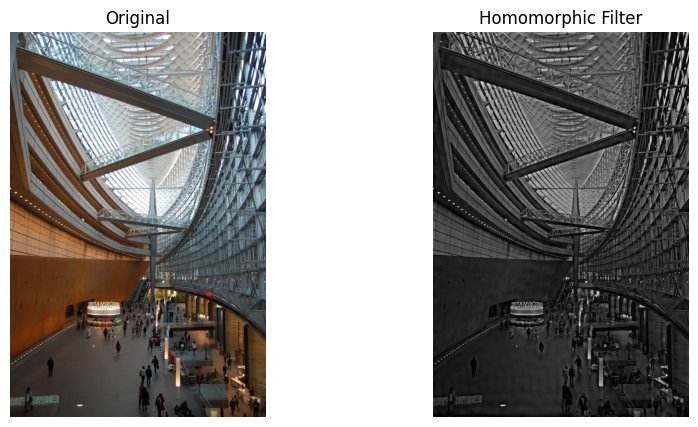

In [33]:
# Load the image from the path
image = load_image_from_path(path)

# Apply Homomorphic filtering
homomorphic_image = apply_homomorphic_filter(image)
display_image(image, homomorphic_image, title2="Homomorphic Filter")
